<a href="https://colab.research.google.com/github/limruby/sentiment_analysis/blob/branch-1/Sentiment_Analysis_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**








*   Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
*   NLTK is a leading platform for building Python programs to work with human language data.






In [2]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **2. Import Data**

In [3]:
# Import data from Github
url = 'https://raw.githubusercontent.com/limruby/sentiment_analysis/branch-2/Maskmandate2.csv'
df = pd.read_csv(url, sep=',', encoding = "ISO-8859-1")

In [4]:
df.head(5)

,created_time,message
0,11/1/2021 10:32,But once the mandate on the shot takes place w...
1,11/1/2021 9:31,He can go fuck himself...i have my rights...bu...
2,11/1/2021 9:08,Oh well...I'm not being ordered to do anything!!
3,12/1/2021 7:43,Dont forget to pok a hole in the mouth area w...
4,14/1/2021 23:44,I live in a state where masks are mandated and...


In [5]:
df.shape

(721, 2)

# **3. PreProcessing**


###2. Clean Text

In [6]:
# Remove Duplicate from selected column
df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)
# Remove Username
df['message'] = df['message'].str.replace('@[^\s]+','', case=False)
# Remove @mentions
df['message'] = df['message'].str.replace('@[A-Za-z0–9]+', '', case=False)
# Remove #hashtag
df['message'] = df['message'].str.replace('#', '', case=False)

df.message

0      But once the mandate on the shot takes place w...
1      He can go fuck himself...i have my rights...bu...
2       Oh well...I'm not being ordered to do anything!!
3      Dont forget to pok a hole in the mouth area w...
4      I live in a state where masks are mandated and...
                             ...                        
716                                              I agree
717                                ????????????????biden
718    Hes not my president and I dont give a fuck ...
719                                                  NaN
720                                                  NaN
Name: message, Length: 721, dtype: object

###3. LowerCasing


In [7]:
# Change the message column into lowercase
df['message'] = df['message'].str.lower()
df.message

0      but once the mandate on the shot takes place w...
1      he can go fuck himself...i have my rights...bu...
2       oh well...i'm not being ordered to do anything!!
3      dont forget to pok a hole in the mouth area w...
4      i live in a state where masks are mandated and...
                             ...                        
716                                              i agree
717                                ????????????????biden
718    hes not my president and i dont give a fuck ...
719                                                  NaN
720                                                  NaN
Name: message, Length: 721, dtype: object

# **4. Sentiment Analysis**

###Get Subjectivity & polarity

In [8]:
# Change title to string
df['message'] = df['message'].astype(str)

In [9]:
# Create a function to get subjectivity
def getSubjectivity(message):
  return TextBlob(message).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(message):
  return TextBlob(message).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df ['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)

# Display data
df

,created_time,message,Subjectivity,Polarity
0,11/1/2021 10:32,but once the mandate on the shot takes place w...,0.000000,0.000000
1,11/1/2021 9:31,he can go fuck himself...i have my rights...bu...,0.600000,-0.625000
2,11/1/2021 9:08,oh well...i'm not being ordered to do anything!!,0.000000,0.000000
3,12/1/2021 7:43,dont forget to pok a hole in the mouth area w...,0.454545,0.136364
4,14/1/2021 23:44,i live in a state where masks are mandated and...,0.590625,0.050379
...,...,...,...,...
716,11/1/2021 9:06,i agree,0.000000,0.000000
717,11/1/2021 9:06,????????????????biden,0.000000,0.000000
718,11/1/2021 9:50,hes not my president and i dont give a fuck ...,0.600000,-0.400000
719,NaN,nan,0.000000,0.000000


In [10]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display data
df

,created_time,message,Subjectivity,Polarity,Analysis
0,11/1/2021 10:32,but once the mandate on the shot takes place w...,0.000000,0.000000,Neutral
1,11/1/2021 9:31,he can go fuck himself...i have my rights...bu...,0.600000,-0.625000,Negative
2,11/1/2021 9:08,oh well...i'm not being ordered to do anything!!,0.000000,0.000000,Neutral
3,12/1/2021 7:43,dont forget to pok a hole in the mouth area w...,0.454545,0.136364,Positive
4,14/1/2021 23:44,i live in a state where masks are mandated and...,0.590625,0.050379,Positive
...,...,...,...,...,...
716,11/1/2021 9:06,i agree,0.000000,0.000000,Neutral
717,11/1/2021 9:06,????????????????biden,0.000000,0.000000,Neutral
718,11/1/2021 9:50,hes not my president and i dont give a fuck ...,0.600000,-0.400000,Negative
719,NaN,nan,0.000000,0.000000,Neutral


### Print Positive Comments


In [11]:
# Print all positive comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['message'][i])
    print()
    j= j+1

1) dont forget to pok a hole in the mouth area when designing a new mask to insert a straw so food can suck in... restaurant will have new menu called protein meat smoothies

2) i live in a state where masks are mandated and its a fight every day to get customers to wear their masks when they come in the basic human instinct is to make our own decisions ppl can be told to do something but its up to them to actually do it i personally am over the lies and the bullshit welcome to 4 years of ridiculous crap

3) at first he said he would not do that when president. now he is.

4) it is about control. see how fast they can tell us what to do and where to go. 

5) hes not pushing for a mask mandate he does know what hes doing he has dementia its a cronies around him. and honestly what have people been doing for months now. he will not do a better job than president trump he certainly didnt do it with sars when you were in office and did a terrible job

6) go smell harris hair and leave 

### Print Negative Comments


In [12]:
# Print all negative comments
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

1)he can go fuck himself...i have my rights...but i choose to wear one because of my job and my family...not doe him! never!

2)if they've been wearing them in the states that have covid the worst then why is covid still so bad thete 3

3)wrong, who told you to say that joe

4)i see he got his second shot today sad. 4 the rest of the u.s.

5)i am so sick of the dam mask and sick of hearing about covid too

6)that's common sense don't need the president to tell.us that.

7)stop the fear! open up, lets get to herd immunity already. mask dont work obviously, if its still raging? life is inherently dangerous. go hide under a rock if its too much for you to bare! 

8)sorry its my right and ill fight it all the way to court 

9)with everything going on hes about to be in jail with pelosi

10)facebook and twitter stock holders sell your stock before it's worthless.

11)sleep joe  is stupid  he can't  remember  anything  he  says  are where he is... we are going  to  be  in a  lot of  tr

### Visualization

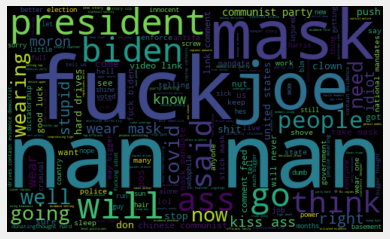

In [13]:
# plot Word Cloud
allWords = ' '.join( [message for message in df['message']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

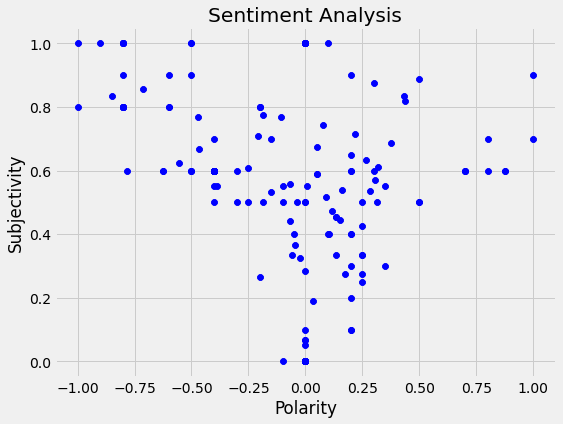

In [14]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<function matplotlib.pyplot.show>

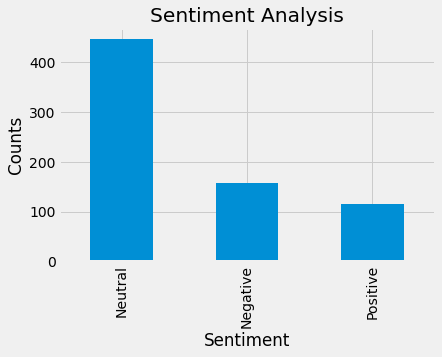

In [15]:
# Show value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

### Save to CSV

In [ ]:
df.to_csv('Output_File.csv', index=False)